## Use pandas dataframe with poverty data
Use this source: https://data.worldbank.org/indicator/SI.POV.DDAY and extract the csv file in jupyter notebook.
With the help of Pandas' DataFrame do the following
1. Create a line graph showing the development in poverty over time in both Argentina, Ivory cost, USA. (be aware of the missing data in particular years)
2. Find the 10 countries with the highest poverty rate, and plot the rates in a bar chart
3. Show the development of absolute poverty in all the central american countries. Hand in:
  1. A description of what graphical representation you think is best for this task
    * See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html
  2. The actual graphical representation in a Jupyter Notebook
4. From the worldbank api, find one more interesting question you would like to ask. Hand in:
  1. A description of why that question is interesting
  2. A visualisation of the question in your Jupyter Notebook
    * See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html

## Download zip with poverty data and extract files:

In [1]:
import pandas as pd
import requests
import zipfile
from glob import glob
import subprocess
import matplotlib.pyplot as plt
import numpy as np


#data
url = 'http://api.worldbank.org/v2/en/indicator/SI.POV.DDAY?downloadformat=csv'
response = requests.get(url)
fname = response.headers['Content-Disposition'].split('=')[1]

#open file
if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   

#unzip
zipfile.ZipFile(fname, 'r').extractall('.')


#make the file into a variable
local_file = glob('./*API_SI*.csv')[0]

#dataframe, skip first 4 rows
df = pd.read_csv(local_file,skiprows=4)

# Since we are getting the output as a byte literal, we have to decode it into string
cmd = 'sed 5!d {}'.format(local_file).split()
out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                            stderr=subprocess.STDOUT).communicate()
header_cols = out.splitlines()[0].decode('UTF-8').split(',')
header_cols = [h.replace('"', '') for h in header_cols]
        
cmd = ['grep', '-E', 'ARG|CIV|USA', local_file]
out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                            stderr=subprocess.STDOUT).communicate()

lines = out.decode('UTF-8').splitlines()
lines = [l.split(',') for l in lines]
lines = [[c.replace('"', '') for c in l] for l in lines]

print("Done")



Done


## 1. Create a line graph showing the development in poverty over time in both Argentina, Ivory cost, USA. (be aware of the missing data in particular years):


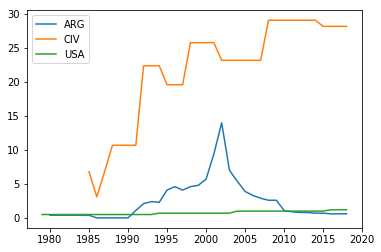

In [2]:
#Argentina
pov_arg = pd.Series(lines[0][4:-1], index=np.asarray(header_cols[4:-1], dtype=float))

#Ivory Coast
pov_civ = pd.Series(lines[1][4:-1], index=np.asarray(header_cols[4:-1], dtype=float))

#USA
pov_usa = pd.Series(lines[2][4:-1], index=np.asarray(header_cols[4:-1], dtype=float))

#Convert to numeric type
pov_arg = pd.to_numeric(pov_arg)
pov_civ = pd.to_numeric(pov_civ)
pov_usa = pd.to_numeric(pov_usa)

#concat arg, civ & usa to same plot, create legend
pov = pd.concat([pov_arg.ffill(), pov_civ.ffill(), pov_usa.ffill()], axis=1, keys=['ARG', 'CIV', 'USA'])
pov.plot()

## 2. Find the 10 countries with the highest poverty rate, and plot the rates in a bar chart


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

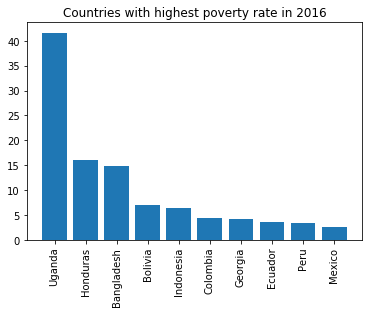

In [3]:
#nlargest finds the (10) largest values in column(year == 2016).
top10 = df.nlargest(10, "2016")
countries = top10["Country Name"]
country_values = top10.iloc[:]["2016"].values

plt.title("Countries with highest poverty rate in 2016")
plt.bar(countries,country_values)
plt.xticks(rotation=90)


## 3. Show the development of absolute poverty in all the central american countries.

###   1. A description of what graphical representation you think is best for this task:
By displaying the countries in a line graph, we can easily distinguish and compare the different countries and see the yearly trend:


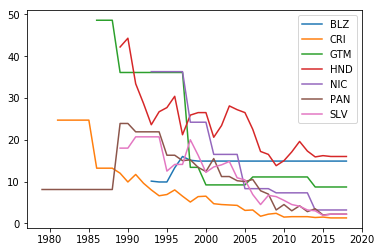

In [4]:
cmd = ['grep', '-E', 'BLZ|CRI|SLV|GTM|HND|NIC|PAN', local_file]
out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                            stderr=subprocess.STDOUT).communicate()

lines = out.decode('UTF-8').splitlines()
lines = [l.split(',') for l in lines]
lines = [[c.replace('"', '') for c in l] for l in lines]

cmd = 'sed 5!d {}'.format(local_file).split()
out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                            stderr=subprocess.STDOUT).communicate()

# Since we are getting the output as a byte literal, we have to decode it into string
header_cols = out.splitlines()[0].decode('UTF-8').split(',')
header_cols = [h.replace('"', '') for h in header_cols]

central_america = df[df['Country Code'].isin(['BLZ', 'CRI', 'SLV', 'GTM', 'HND', 'NIC', 'PAN'])]

central_america.iloc[2][4:-1]

countries = central_america["Country Name"]
myMask = central_america["Country Name"] == "Belize"
central_america.iloc[0][4:-1]

lines_labels = []
lines_values = []

for country in range(len(central_america)):
    lines_labels.append(lines[country][1])
    pov = pd.Series(lines[country][4:-1], index=np.asarray(header_cols[4:-1], dtype=int))
    lines_values.append(pd.to_numeric(pov).ffill())

# axis=0 is default (concats like sql UNION) axis=1 concats the data along the x axis    
povs = pd.concat(lines_values, axis=1, keys=lines_labels)

povs.plot()

## 4. From the worldbank api, find one more interesting question you would like to ask. Hand in:

In [5]:
import requests
import zipfile

url = 'http://api.worldbank.org/v2/en/indicator/SH.ALC.PCAP.LI?downloadformat=csv'
response = requests.get(url)

print(response.headers)
fname = response.headers['Content-Disposition'].split('=')[1]

if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   
print('-----------------')
print('Downloaded {}'.format(fname))

fname = 'API_SH.ALC.PCAP.LI_DS2_en_csv_v2_10477061.zip'
zipfile.ZipFile(fname, 'r').extractall('.')
from glob import glob
# glob is useful in any situation where your program needs to look for a list of files on the filesystem with names matching a pattern. If you need a list of filenames that all have a certain extension, prefix, or any common string in the middle, use glob instead of writing code to scan the directory contents yourself.

local_file = glob('./*API_SH*.csv')[0]
local_file

{'Date': 'Thu, 07 Mar 2019 14:30:02 GMT', 'Content-Type': 'application/zip', 'Content-Length': '16140', 'Connection': 'keep-alive', 'Content-Disposition': 'attachment; filename=API_SH.ALC.PCAP.LI_DS2_en_csv_v2_10477061.zip', 'X-Powered-By': 'ASP.NET', 'Set-Cookie': 'TS01fa65e4=01359ee9763e4b8bcb905cf722cf5b6deb367445becb2d3875c313f05c756070cf39daebf5; Path=/', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains', 'X-XSS-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny'}
-----------------
Downloaded API_SH.ALC.PCAP.LI_DS2_en_csv_v2_10477061.zip


'.\\API_SH.ALC.PCAP.LI_DS2_en_csv_v2_10477061.csv'

In [6]:
#Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)
alcohol_file = pd.read_csv(local_file, skiprows=4)
top_x = alcohol_file.nlargest(10,'2016')
dk = alcohol_file[(alcohol_file['Country Name'] == 'Denmark')]["2016"]
country_labels = list(top_x['Country Name'].values)
country_labels.append('DNK')
country_values = list(top_x['2016'].values)
country_values.append(float(dk))

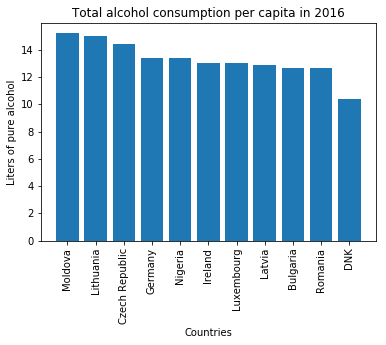

In [7]:
import matplotlib.pyplot as plt
 
# Data to plot
alabels = country_labels
sizes = country_values
 
# Plot
plt.bar(labels, sizes)
plt.title("Total alcohol consumption per capita in 2016")
plt.ylabel("Liters of pure alcohol")
plt.xlabel("Countries")
plt.xticks(rotation=90)
plt.show()